In [1]:
import numpy as np
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI
import sys
import json
import pyPPG

In [6]:
x = np.array(list(range(0,1920, 600)))
print(x)
print(np.where([x >= 1920 - 750]))
x = x[0:min(np.where([x >= 1920 - 750])[1])]
print(x)

[   0  600 1200 1800]
(array([0, 0]), array([2, 3]))
[  0 600]


In [27]:
train_data = np.load('x_test.npy')
train_data = train_data.reshape(train_data.shape[0], -1)
fs = 240
start_sig = 0
end_sig = -1
savingfolder = 'biomarkers'
savingformat = 'csv'

In [28]:
from matplotlib import pyplot as plt

def plot_ppg_data(signal, fs):

    # setup figure
    fig, ax = plt.subplots(figsize=(15, 5))

    # create time vector
    t = np.arange(0, len(signal))/fs

    # plot raw PPG signal
    ax.plot(t, signal, color = 'blue')
    ax.set(xlabel = 'Time (s)', ylabel = 'raw PPG')

    # show plot
    plt.show()

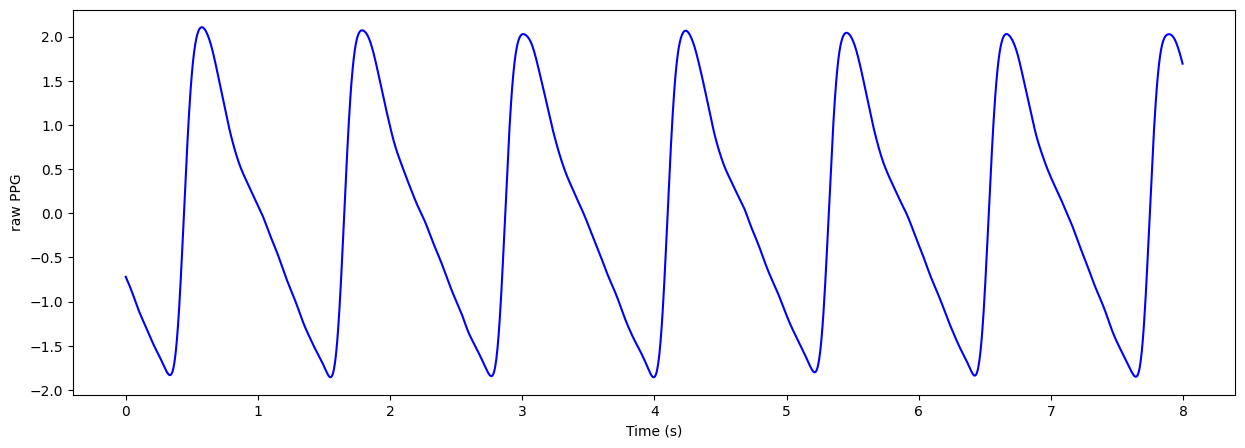

In [29]:
ppg_example = train_data[0]

plot_ppg_data(ppg_example, fs)

In [157]:
from scipy.io import savemat
from scipy.signal import resample
for i, segment in enumerate(train_data[0:5]):
    # segment = resample(segment, int(len(segment) *  100 / 240))
    # segment = np.tile(segment, 2)
    # print(segment.shape)
    signal_column = segment.reshape(-1, 1)  # Convert to (1920, 1)
    np.expand_dims(signal_column, axis=1)
    # signal_column = signal_column.tolist()
    # print(signal_column.shape)
    mat_data = {
        'Data': signal_column,
        'Fs': 240
    }

    filename = f"segment_{i}.mat"
    savemat(filename, mat_data)
    

In [139]:
# Generate a longer dummy signal: 60 seconds at 240 Hz
long_signal = np.random.rand(60 * 240).reshape(-1, 1)

savemat("long_segment.mat", {
    "Data": long_signal,
    "Fs": 240,
})

In [144]:
from pyPPG.example import ppg_example
import pandas as pd


# data_path = "Sample_PPG_MAT_125Hz.mat" # the path of the file containing the PPG signal to be analysed
data_path = "segment_0.mat"
start_sig = 0 # the first sample of the signal to be analysed
end_sig = -1 # the last sample of the signal to be analysed (here a value of '-1' indicates the last sample)
savingfolder = 'temp_dir'
savingformat = 'csv'

In [145]:
signal = load_data(data_path=data_path)
signal.v = signal.v

In [146]:
print(signal.v.shape)
print(type(signal))

(3840,)
<class 'dotmap.DotMap'>


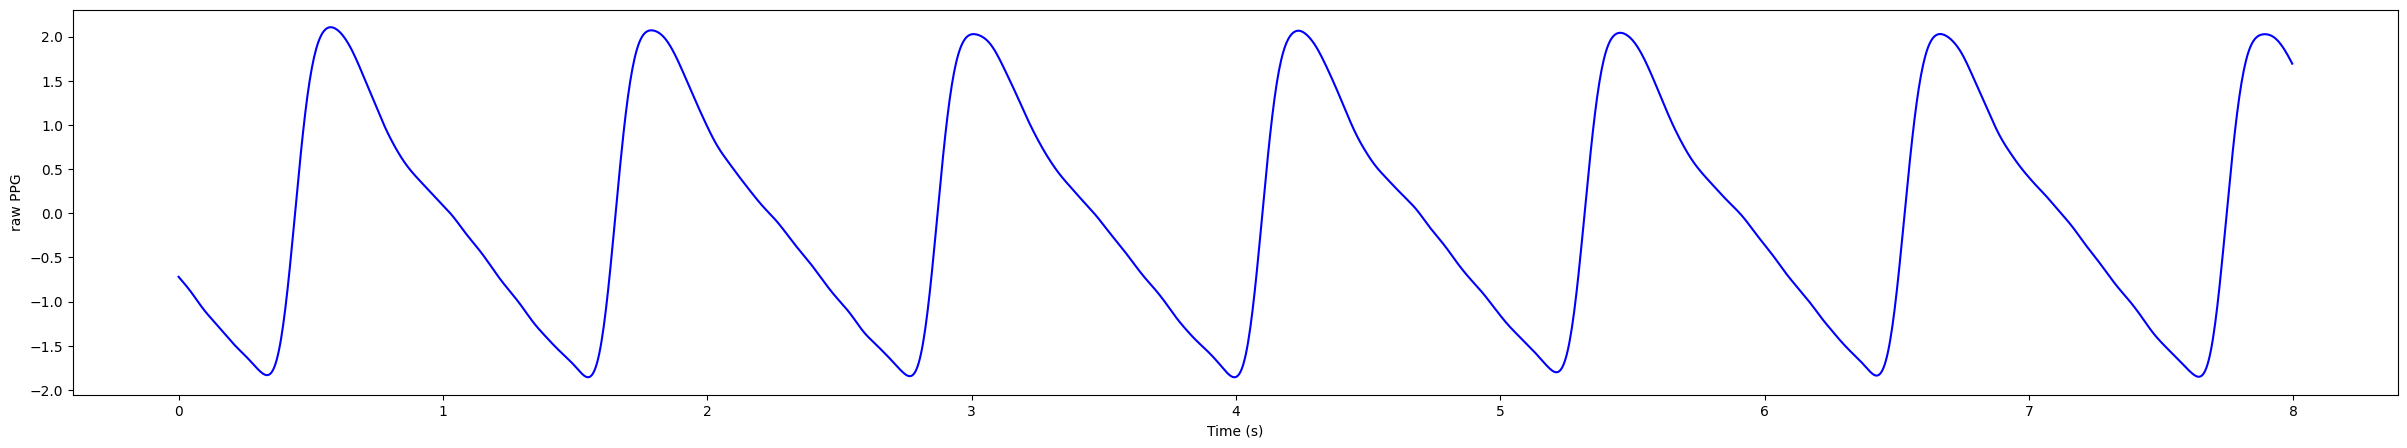

In [130]:

# import plotting package
from matplotlib import pyplot as plt

# setup figure
fig, ax = plt.subplots(figsize=(30, 5))

# create time vector
t = np.arange(0, len(signal.v))/signal.fs

# plot raw PPG signal
ax.plot(t, signal.v, color = 'blue')
ax.set(xlabel = 'Time (s)', ylabel = 'raw PPG')

# show plot
plt.show()

In [131]:
import pyPPG.preproc


signal.filtering = True # whether or not to filter the PPG signal
signal.fL=0.5000001 # Lower cutoff frequency (Hz)
signal.fH=12 # Upper cutoff frequency (Hz)
signal.order=4 # Filter order
signal.sm_wins={'ppg':50,'vpg':10,'apg':10,'jpg':10} # smoothing windows in millisecond for the PPG, PPG', PPG", and PPG'"

signal.ppg, signal.vpg, signal.apg, signal.jpg = pyPPG.preproc.Preprocessing(s = signal, filtering=True)
# signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)

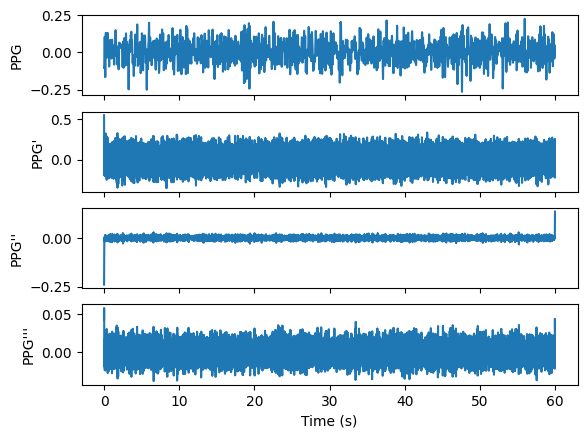

In [111]:
# setup figure
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

# create time vector
t = np.arange(0, len(signal.ppg))/signal.fs

# plot filtered PPG signal
ax1.plot(t, signal.ppg)
ax1.set(xlabel = '', ylabel = 'PPG')

# plot first derivative
ax2.plot(t, signal.vpg)
ax2.set(xlabel = '', ylabel = 'PPG\'')

# plot second derivative
ax3.plot(t, signal.apg)
ax3.set(xlabel = '', ylabel = 'PPG\'\'')

# plot third derivative
ax4.plot(t, signal.jpg)
ax4.set(xlabel = 'Time (s)', ylabel = 'PPG\'\'\'')

# show plot
plt.show()

In [112]:
# Initialise the correction for fiducial points
corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
correction=pd.DataFrame()
correction.loc[0, corr_on] = True
signal.correction=correction

# Create a PPG class
s = PPG(signal)

In [ ]:
# import numpy as np
# import pyPPG.fiducials as fid

# def fixed_get_peak_onset(self, peak_detector):
#     px = self.signal.v
#     fs = self.signal.fs
#     up = self.signal.up
#     win_starts, win_ends = self.get_windows(len(px), fs, up)
#     all_p4 = []
#     all_hr = []

#     for win_no in range(len(win_starts)):
#         p4, hr = peak_detector(px[win_starts[win_no]:win_ends[win_no]], fs)
#         if p4 is not None:
#             all_p4 += list(p4)
#             all_hr.append(hr)

#     # Patch line that causes the crash
#     all_p4 = np.array(all_p4).astype(int)
#     all_p4 = np.unique(all_p4)

#     peaks, fn = self.correct_IBI(all_p4, px, np.median(all_hr), fs, up)
#     onsets = self.get_onsets(peaks)

#     return peaks, onsets

# # Apply the monkey-patch
# fid.FpCollection.get_peak_onset = fixed_get_peak_onset


In [114]:
fpex = FP.FpCollection(s)
fiducials = fpex.get_fiducials(s)

In [133]:
from pyPPG.example import ppg_example
ppg_example()

2025-04-21 15:59:23.414 python[83445:6882918] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (804.98 secs).
2025-04-21 15:59:23.414 python[83445:6882918] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (804.98 secs).
2025-04-21 15:59:23.498 python[83445:6882918] +[CATransaction synchronize] called within transaction
2025-04-21 15:59:23.553 python[83445:6882918] +[CATransaction synchronize] called within transaction
2025-04-21 15:59:23.730 python[83445:6882918] +[CATransaction synchronize] called within transaction
2025-04-21 15:59:26.996 python[83445:6882918] +[CATransaction synchronize] called within transaction


AttributeError: 'list' object has no attribute 'astype'